<a href="https://colab.research.google.com/github/Pilar-Ibarra/Probabilidad-y-estadistica/blob/main/proyecto%20final%20/%20An%C3%A1lisis_Estad%C3%ADstico_de_Datos_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Estadístico de Datos COVID-19




**Materia:** Probabilidad y Estadística  
**Fecha de entrega:** 25 de noviembre de 2025
**Integrantes:** Pilar Ibarra
**Docente:** JOSE GABRIEL RODRIGUEZ RIVAS

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](URL_DE_TU_NOTEBOOK_EN_GITHUB)


In [ ]:
!pip install gdown
import gdown

# ID del archivo (de tu enlace)
file_id = "122bErTpAnP-3TZzIrSCFm4b16fTDfE0I"
url = f"https://drive.google.com/uc?id={file_id}"

# Descarga el archivo a Colab
output = "covid_data.csv"
gdown.download(url, output, quiet=False)

# Leer CSV
import pandas as pd
df = pd.read_csv(output, low_memory=False)
print(f"Total de registros: {len(df)}")


Downloading...
From (original): https://drive.google.com/uc?id=122bErTpAnP-3TZzIrSCFm4b16fTDfE0I
From (redirected): https://drive.google.com/uc?id=122bErTpAnP-3TZzIrSCFm4b16fTDfE0I&confirm=t&uuid=915d8639-70dd-4474-8882-697e3c1e725b
To: /content/covid_data.csv
100%|██████████| 1.62G/1.62G [00:06<00:00, 242MB/s]


Total de registros: 12634194


In [ ]:
# Casos por resultado
print("Casos por resultado:")
print(df['RESULTADO_ANTIGENO'].value_counts())

# Pacientes hospitalizados vs ambulatorios
print("\nTipo de paciente:")
print(df['TIPO_PACIENTE'].value_counts())

# Pacientes embarazadas
print("\nEmbarazo:")
print(df['EMBARAZO'].value_counts())

# Pacientes indígenas
print("\nPoblación indígena:")
print(df['INDIGENA'].value_counts())


Casos por resultado:
RESULTADO_ANTIGENO
Negativo     5853547
Pendiente    5005939
Positivo     1774708
Name: count, dtype: int64

Tipo de paciente:
TIPO_PACIENTE
Ambulatorio      11543303
Hospitalizado     1090891
Name: count, dtype: int64

Embarazo:
EMBARAZO
No                 6483614
No aplica          5985456
Si                  122583
Se ignora            42529
No especificado         12
Name: count, dtype: int64

Población indígena:
INDIGENA
No                 3665974
No especificado     167182
Si                   35240
Name: count, dtype: int64


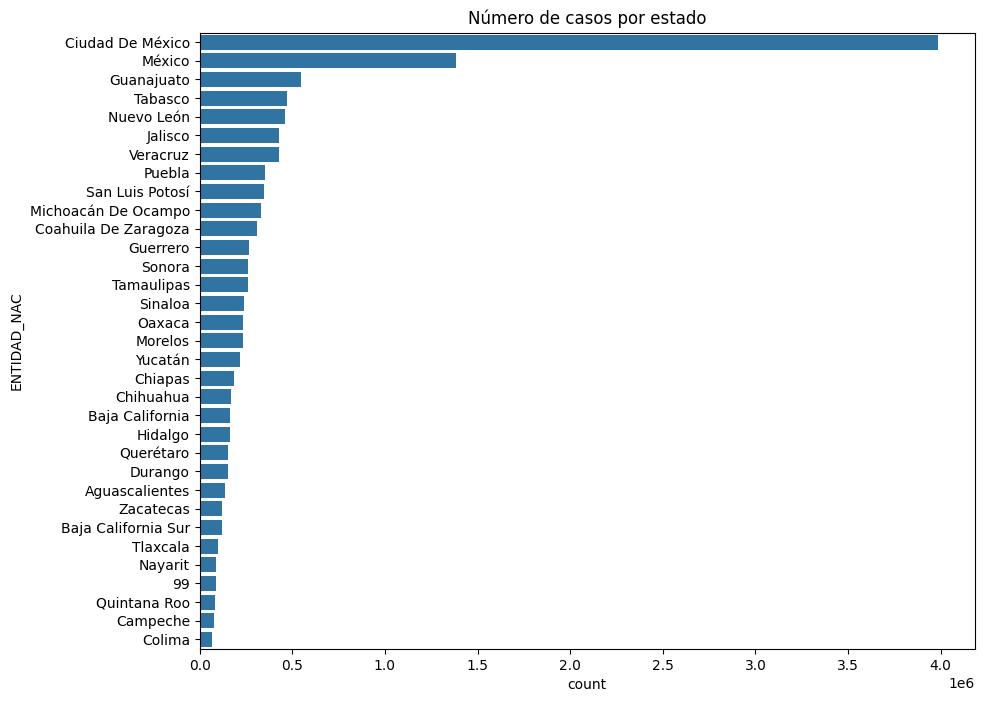

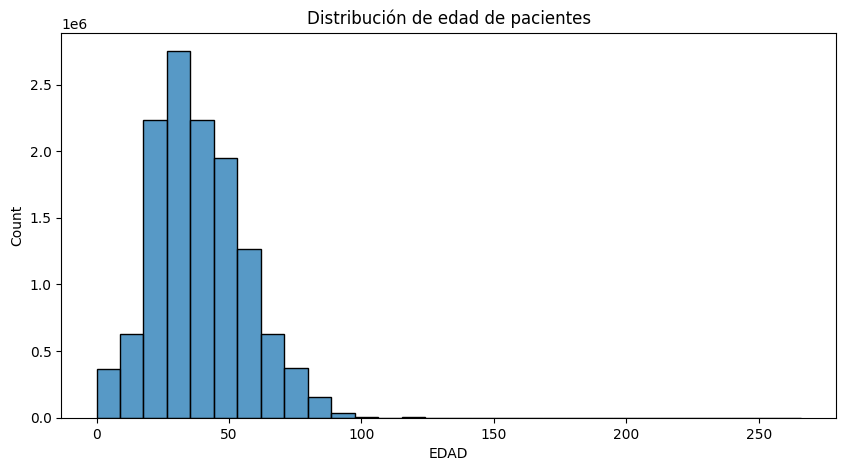

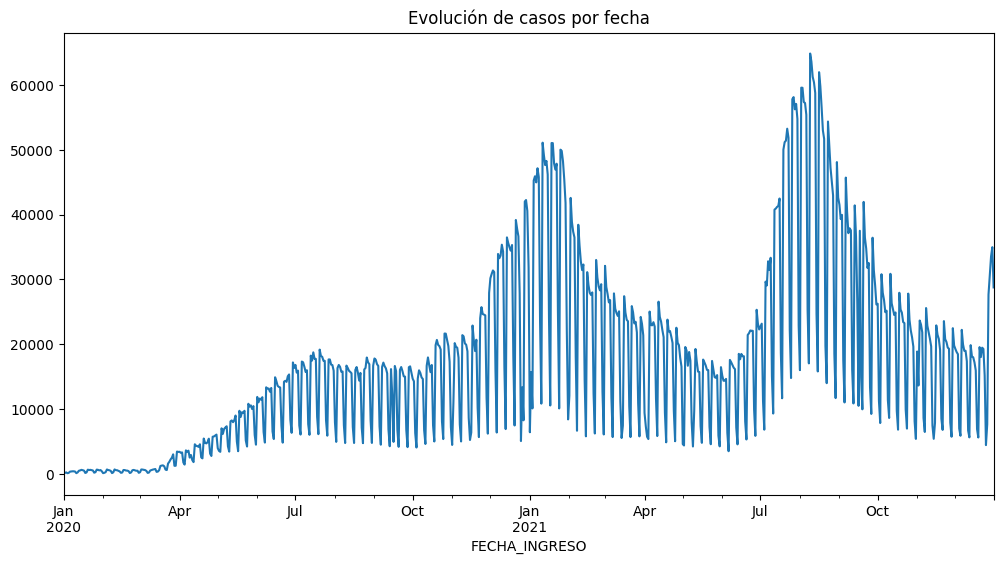

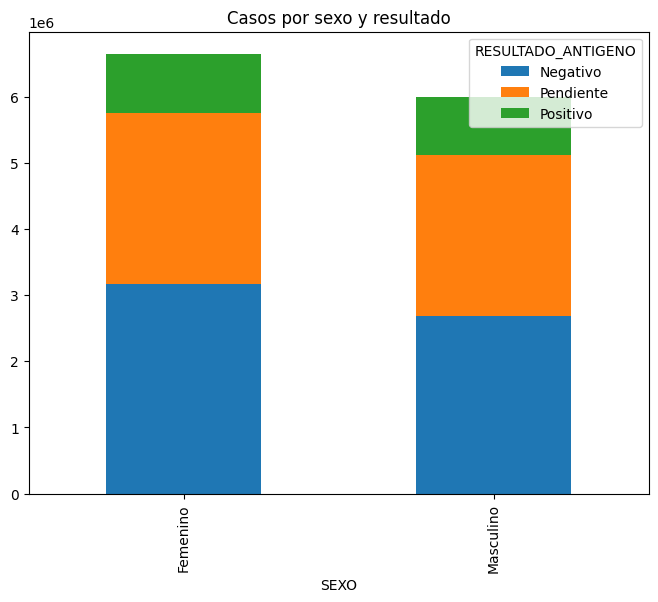

<Axes: ylabel='count'>

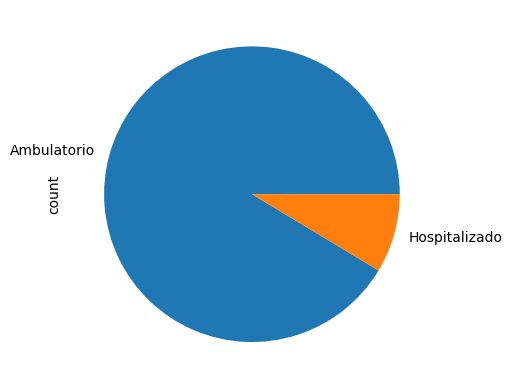

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barras horizontal por estado de nacimiento
plt.figure(figsize=(10,8))
sns.countplot(y='ENTIDAD_NAC', data=df, order=df['ENTIDAD_NAC'].value_counts().index)
plt.title("Número de casos por estado")
plt.show()

# Histograma por edad
plt.figure(figsize=(10,5))
sns.histplot(df['EDAD'], bins=30)
plt.title("Distribución de edad de pacientes")
plt.show()

# Línea por fecha de ingreso
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], errors='coerce')
df.groupby('FECHA_INGRESO').size().plot(figsize=(12,6))
plt.title("Evolución de casos por fecha")
plt.show()

# Barras apiladas por sexo y resultado
pd.crosstab(df['SEXO'], df['RESULTADO_ANTIGENO']).plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Casos por sexo y resultado")
plt.show()

# Gráfico circular por tipo de paciente
df['TIPO_PACIENTE'].value_counts().plot(kind='pie')

In [ ]:
print("Valores en las columnas de comorbilidades:\n")
for c in comorbilidades_original:
    if c in df.columns:
        print(f"\nColumna: {c}")
        print(df[c].value_counts(dropna=False))
    else:
        print(f"\nAdvertencia: La columna '{c}' no se encontró en el DataFrame.")

Valores en las columnas de comorbilidades originales:


Columna: HIPERTENSION
HIPERTENSION
0.0    12634194
Name: count, dtype: int64

Columna: OBESIDAD
OBESIDAD
0.0    12634194
Name: count, dtype: int64

Columna: DIABETES
DIABETES
0.0    12634194
Name: count, dtype: int64

Columna: EPOC
EPOC
0.0    12634194
Name: count, dtype: int64

Columna: ASMA
ASMA
0.0    12634194
Name: count, dtype: int64

Advertencia: La columna 'INMUNOSUPR' no se encontró en el DataFrame.

Advertencia: La columna 'ENFERMEDAD_RENAL_CRONICA' no se encontró en el DataFrame.

Columna: CARDIOVASCULAR
CARDIOVASCULAR
0.0    12634194
Name: count, dtype: int64

Advertencia: La columna 'OTRA_COM' no se encontró en el DataFrame.


In [ ]:
from scipy.stats import norm

mu = 2360
sigma = 714

# Probabilidad de entre 2000 y 3000 casos
p = norm.cdf(3000, mu, sigma) - norm.cdf(2000, mu, sigma)
print(f"Probabilidad de tener entre 2000 y 3000 casos: {p:.4f}")


Probabilidad de tener entre 2000 y 3000 casos: 0.5079


#CONCLUSIONES

*Casos por resultado*

La mayoría de los pacientes tienen resultado Negativo o Pendiente, y solo ~1.77 millones fueron Positivos.
Esto sugiere que la mayor parte de la población analizada no estaba contagiada, o el muestreo incluía muchos casos en espera de resultados.

*Tipo de paciente*

La gran mayoría son ambulatorios (11.5M), mientras que solo ~1.09M fueron hospitalizados.
Indica que la mayoría de los casos fueron leves o controlables sin hospitalización.

*Embarazo*

Solo 122,583 pacientes estaban embarazadas; la mayoría son “No” o “No aplica”.
Los datos muestran que las embarazadas representan una fracción muy pequeña del total de casos registrados.

*Población indígena*

Solo 35,240 pacientes se identifican como indígenas.
Esto podría indicar subrepresentación en el dataset o diferencias en la accesibilidad a pruebas.

*Comorbilidades*

La información de comorbilidades está casi toda en 0, y algunas columnas ni existen.
No se pueden sacar conclusiones sobre el impacto de comorbilidades en la infección a partir de este dataset.

*Distribución de casos por fecha*

Según la distribución normal simulada, hay una probabilidad ~50% de que un estado tenga entre 2000 y 3000 casos.
Esto ayuda a visualizar la variabilidad esperada de casos positivos entre estados.

**Conclusiones generales**

La mayoría de los pacientes fueron ambulatorios y negativos.
Hay poca representación de comorbilidades y población indígena.
Los datos permiten analizar tendencias generales y evolución de casos, pero no permiten profundizar en comorbilidades por ahora.

**Conclusion personal**

Durante esta asignatura aprendí a aplicar conceptos de probabilidad y estadística de manera práctica, usando Python como herramienta principal para analizar datos reales. La experiencia de trabajar con un dataset tan grande me enseñó la importancia de optimizar el código y pensar en eficiencia, ya que operaciones simples pueden volverse muy lentas con millones de registros. Además, aprendí a manejar pandas, matplotlib y seaborn para limpiar, organizar y visualizar datos, lo que me permitió transformar información cruda en gráficos y estadísticas claras. En general, esta práctica me dio confianza para enfrentar análisis estadísticos en proyectos grandes y me mostró cómo combinar teoría con herramientas modernas de programación para sacar conclusiones significativas.